San Vu Ngoc - [IRMAR](https://irmar.univ-rennes1.fr/)
___

# III. Division euclidienne
## 1. Divisibilité

In [1]:
12%3

0

In [2]:
12%0

ZeroDivisionError: integer division or modulo by zero

In [3]:
0%12

0

Attention, pour tous les langages informatiques, on ne peut pas calculer 0%0, **pourtant 0 est divisible par 0**, car $0 = 1\times 0$

In [4]:
0%0

ZeroDivisionError: integer division or modulo by zero

In [5]:
def divise (i,j): # retourne True si i divise j
    return (i,j) == (0,0) or j == 0 or (i !=0 and (j % i == 0))

In [6]:
divise (3,12), divise (12,3)

(True, False)

In [7]:
divise (0,0), divise (12,0), divise (0,12)

(True, True, False)

## Quels sont les diviseurs de $2^{82,589,933}-1$ ?

(and why we care)

https://www.mersenne.org/primes/?press=M82589933

## Tracé de "i divise j"

i =ligne,  j = colonne

### Initialisations

In [8]:
%matplotlib inline
# inline can be replaced by notebook to get interactive plots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import matplotlib.colors as colors

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

In [9]:
n=100
T = np.zeros((n,n))
for i in range(0, n):
        for j in range(0, n):
            if divise (i,j):
                T[i,j] = 0
            else:
                T[i,j] = 1

In [10]:
T

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

Text(0, 0.5, 'j')

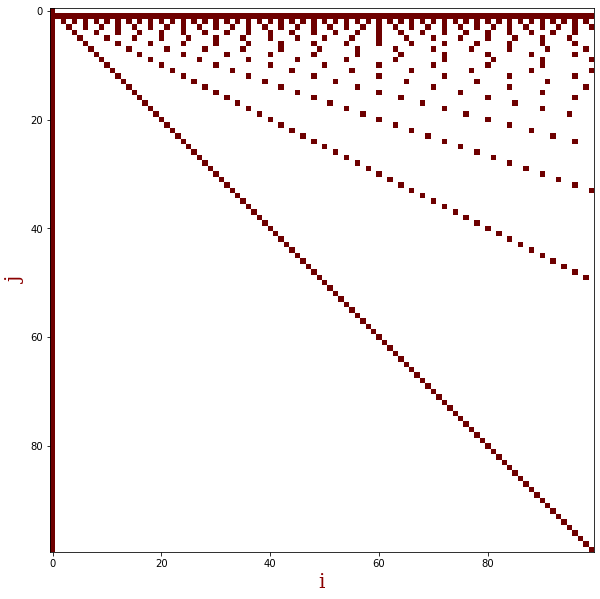

In [11]:
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set figures display bigger
plt.imshow(T+0.15, interpolation='none', clim=(0.0, 1.), cmap=cm.hot)
plt.xlabel('i',fontdict=font)
plt.ylabel('j',fontdict=font)

# choix de la colormap: https://matplotlib.org/users/colormaps.html
# choix de l'interpolation: https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

Text(0.5, 0, 'time (s)')

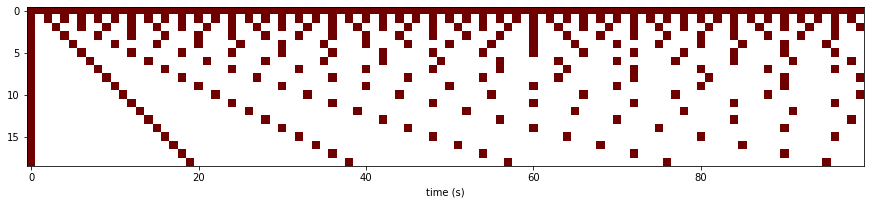

In [12]:
Top = T[1:20,::]
plt.imshow(Top+0.15, interpolation='none', clim=(0.0, 1.), cmap=cm.hot)
plt.xlabel('time (s)')

# II. Division euclidienne

## Version itérative naïve, comme la "preuve graphique" du cours:

In [13]:
def division (a,b):
    q = 0
    m = 0
    while (m <= a):
      m = m + b
      q = q + 1
    return (q - 1, a - m + b)

In [14]:
division (2022,123)

(16, 54)

In [15]:
123*16 + 54

2022

Attention avec les nombres négatifs ça ne marche pas du tout:

In [16]:
division (-2022,123)

(-1, -1899)

**Exercice:** adapter la fonction pour admettre a négatif.

### Version un peu plus élégante avec l'_invariant de boucle_ $a = qb + r$
Les invariants sont très utiles pour éviter les erreurs de programmation.

In [17]:
def division2 (a,b):
    q,r = 0,a
    while r >= b:
        r = r - b
        q = q + 1
    return (q,r)

In [18]:
division2 (2022,123)

(16, 54)

## Version récursive:

In [19]:
def divisionR (a,b):
    if a < b:
        return (0, a)
    else:
        q,r = divisionR (a-b, b)
        return (q+1, r)

In [20]:
divisionR (2022,123)

(16, 54)

## Complexité

Dans ces 3 algorithmes, la complexité (ici, le nombre d'itérations) est a/b+1, donc au pire linéaire en a (pire cas: pour b=1). On peut faire mieux (pour les grands nombres) avec un méthode de type Newton, cf:
https://en.wikipedia.org/wiki/Division_algorithm#Newton%E2%80%93Raphson_division


## En pratique
dans tous les langages de programmation, la division euclidienne est déjà implémentée. 

### En Python:  `(q,r) = (a//b, a%b)`
Attention en Python 2 on faisait `a/b` au lieu de `a//b`

In [21]:
2022/123

16.4390243902439

In [22]:
2022//123

16

In [23]:
2022%123

54

In [24]:
divmod(2022,123)

(16, 54)

Le résultat est correct pour les nombres $a$ négatifs. Donc **attention**: -(a%b) n'est pas égal à (-a)%b !

In [25]:
(-2022)%123

69

In [26]:
-(2022%123)

-54